In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

In [3]:
# Loading the dataset
tesla_data = pd.read_csv('/content/drive/MyDrive/TECH405/Tesla.csv')
tesla_data['Date'] = pd.to_datetime(tesla_data['Date'])
tesla_data = tesla_data.sort_values(by='Date')

In [16]:
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [18]:
tesla_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1692 non-null   datetime64[ns]
 1   Open       1692 non-null   float64       
 2   High       1692 non-null   float64       
 3   Low        1692 non-null   float64       
 4   Close      1692 non-null   float64       
 5   Volume     1692 non-null   int64         
 6   Adj Close  1692 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 92.7 KB


In [21]:
# Focusing on the Close prices
close_prices = tesla_data['Close'].values

In [22]:
# Scaling the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_close_prices = scaler.fit_transform(close_prices.reshape(-1, 1))

In [27]:
# Creating sequences
sequence_length = 60
X, y = [], []
for i in range(sequence_length, len(scaled_close_prices)):
    X.append(scaled_close_prices[i-sequence_length:i, 0])
    y.append(scaled_close_prices[i, 0])

X, y = np.array(X), np.array(y)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))  # Reshaping for RNN

In [28]:
# Spliting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [29]:
# Building the RNN model
model = Sequential([
    SimpleRNN(50, activation='tanh', return_sequences=False, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    Dense(1)  # Regression output
])

In [30]:
# Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [33]:
# Training the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1, verbose=1)

Epoch 1/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0014 - val_loss: 7.9816e-04
Epoch 2/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 3/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0013 - val_loss: 7.3340e-04
Epoch 4/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0014 - val_loss: 6.9464e-04
Epoch 5/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0014 - val_loss: 7.0982e-04
Epoch 6/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0014 - val_loss: 7.3134e-04
Epoch 7/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0013 - val_loss: 7.4332e-04
Epoch 8/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0011 - val_loss: 7.0648e-04
Epoch 9/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0011 - val_loss: 6.5039e-04
Epoch 10/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0011 - val_loss: 0.0014
Epoch 11/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0012 - val_loss: 8.5841e-04
Epoch 12/20
37/37 ━━━━━━━━━

In [32]:
# Prediction
y_pred_scaled = model.predict(X_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [34]:
# Inversing transform predictions and actual values
y_pred = scaler.inverse_transform(y_pred_scaled.reshape(-1, 1))
y_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

In [36]:
# Calculating RMSE
rmse = np.sqrt(mean_squared_error(y_actual, y_pred))
print(f"RMSE: {rmse}")

RMSE: 6.044144344474711


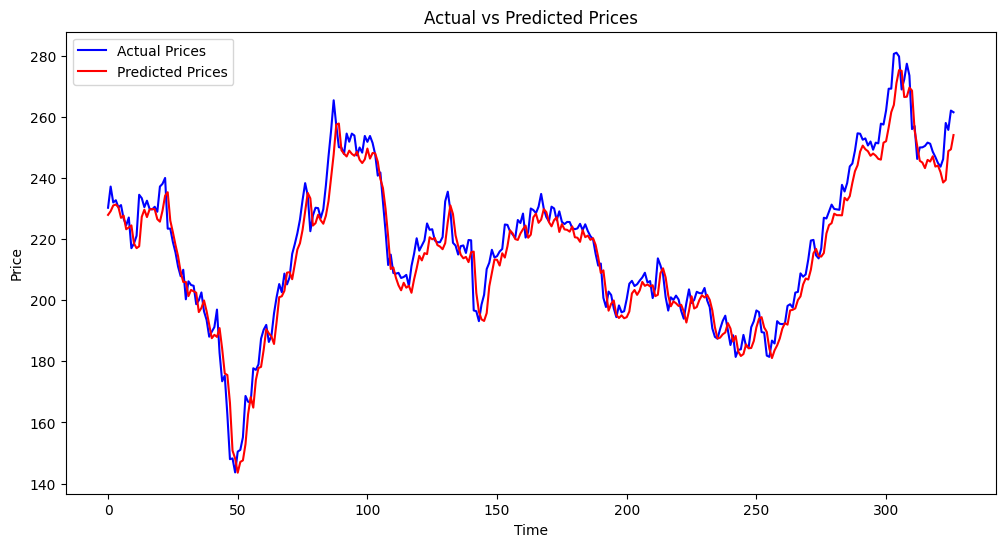

In [37]:
# Plot results
plt.figure(figsize=(12, 6))
plt.plot(y_actual, label='Actual Prices', color='blue')
plt.plot(y_pred, label='Predicted Prices', color='red')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()